In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# Loading the train data
dataset = pd.read_csv("../Dataset/loan_data_set.csv")
# Looking top 10 rows
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Print the rows and column count
print(dataset.shape)

(614, 13)


In [4]:
# Looking the bigger picture
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Checking the number of missing values in each column
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

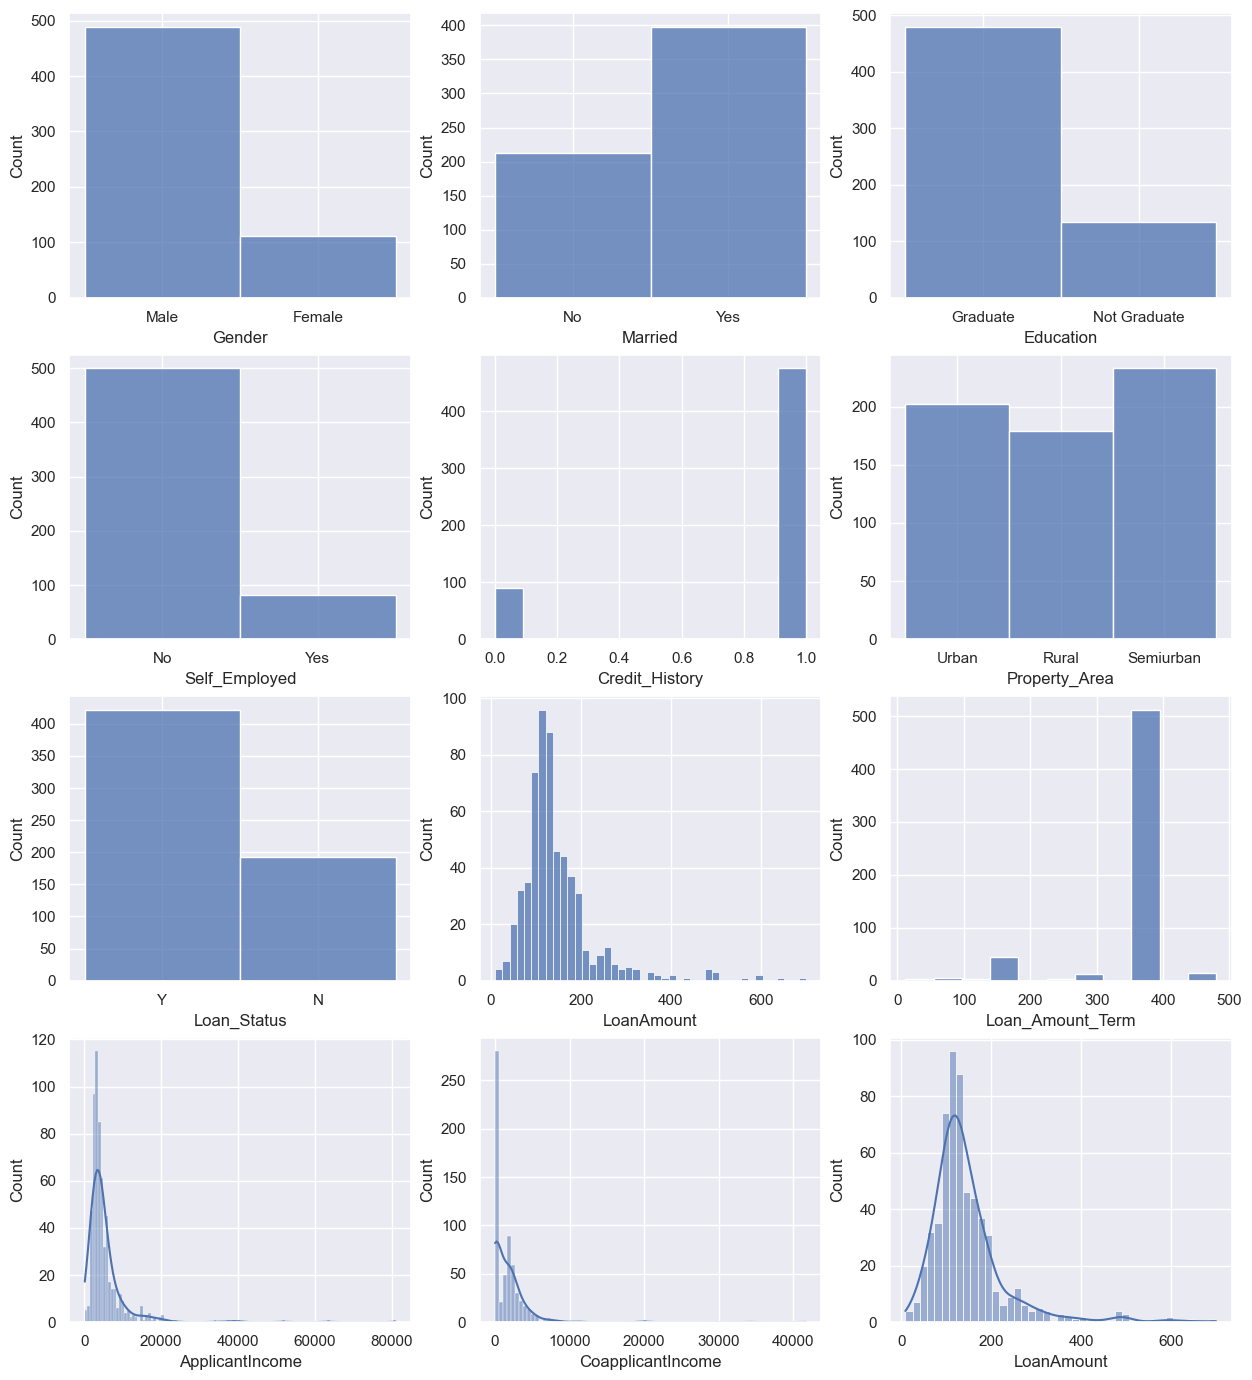

In [6]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(4, 3, figsize=(15, 17))

sns.histplot(data=dataset, x="Gender", ax=axs[0, 0])
sns.histplot(data=dataset, x="Married", ax=axs[0, 1])
sns.histplot(data=dataset, x="Education", ax=axs[0, 2]);
sns.histplot(data=dataset, x="Self_Employed", ax=axs[1, 0])
sns.histplot(data=dataset, x="Credit_History", ax=axs[1, 1])
sns.histplot(data=dataset, x="Property_Area", ax=axs[1, 2]);
sns.histplot(data=dataset, x="Loan_Status", ax=axs[2, 0])
sns.histplot(data=dataset, x="LoanAmount", ax=axs[2, 1])
sns.histplot(data=dataset, x="Loan_Amount_Term", ax=axs[2, 2]);
sns.histplot(data=dataset, x="ApplicantIncome", kde=True, ax=axs[3, 0])
sns.histplot(data=dataset, x="CoapplicantIncome", kde=True, ax=axs[3, 1])
sns.histplot(data=dataset, x="LoanAmount", kde=True, ax=axs[3, 2]);

In [7]:
# See the unique value in gender column
dataset.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [8]:
# See the unique value in Married column
dataset.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [9]:
# See the unique value in Education column
dataset.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [10]:
# See the unique value in Self_Employed column
dataset.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [11]:
# See the unique value in Credit_History column
dataset.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [12]:
# See the unique value in Property_Area column
dataset.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [13]:
# See the unique value in Loan_Status column
dataset.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
# See the unique value in Loan_Amount_Term column
dataset.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
# Statistics about ApplicantIncome, CoapplicantIncome and LoanAmount columns
dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot:>

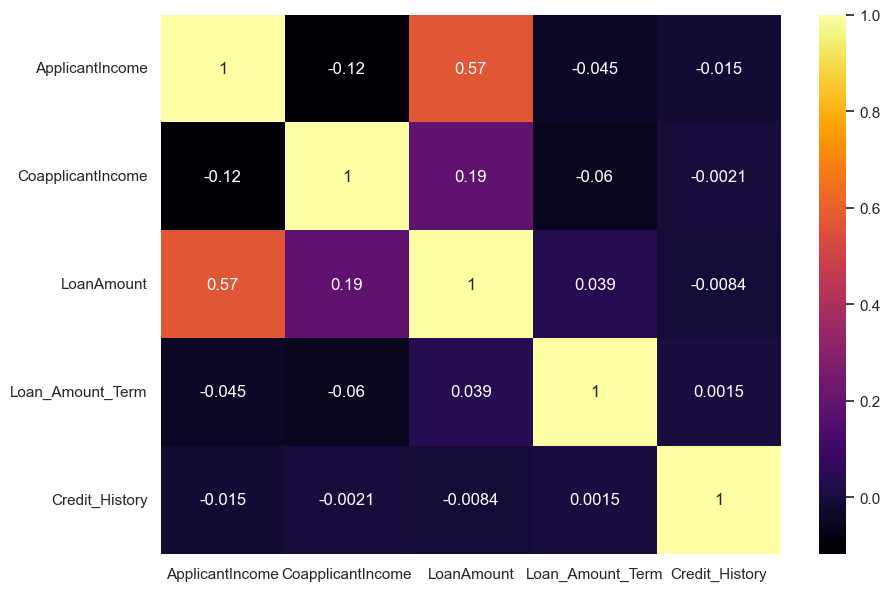

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), annot=True, cmap='inferno')

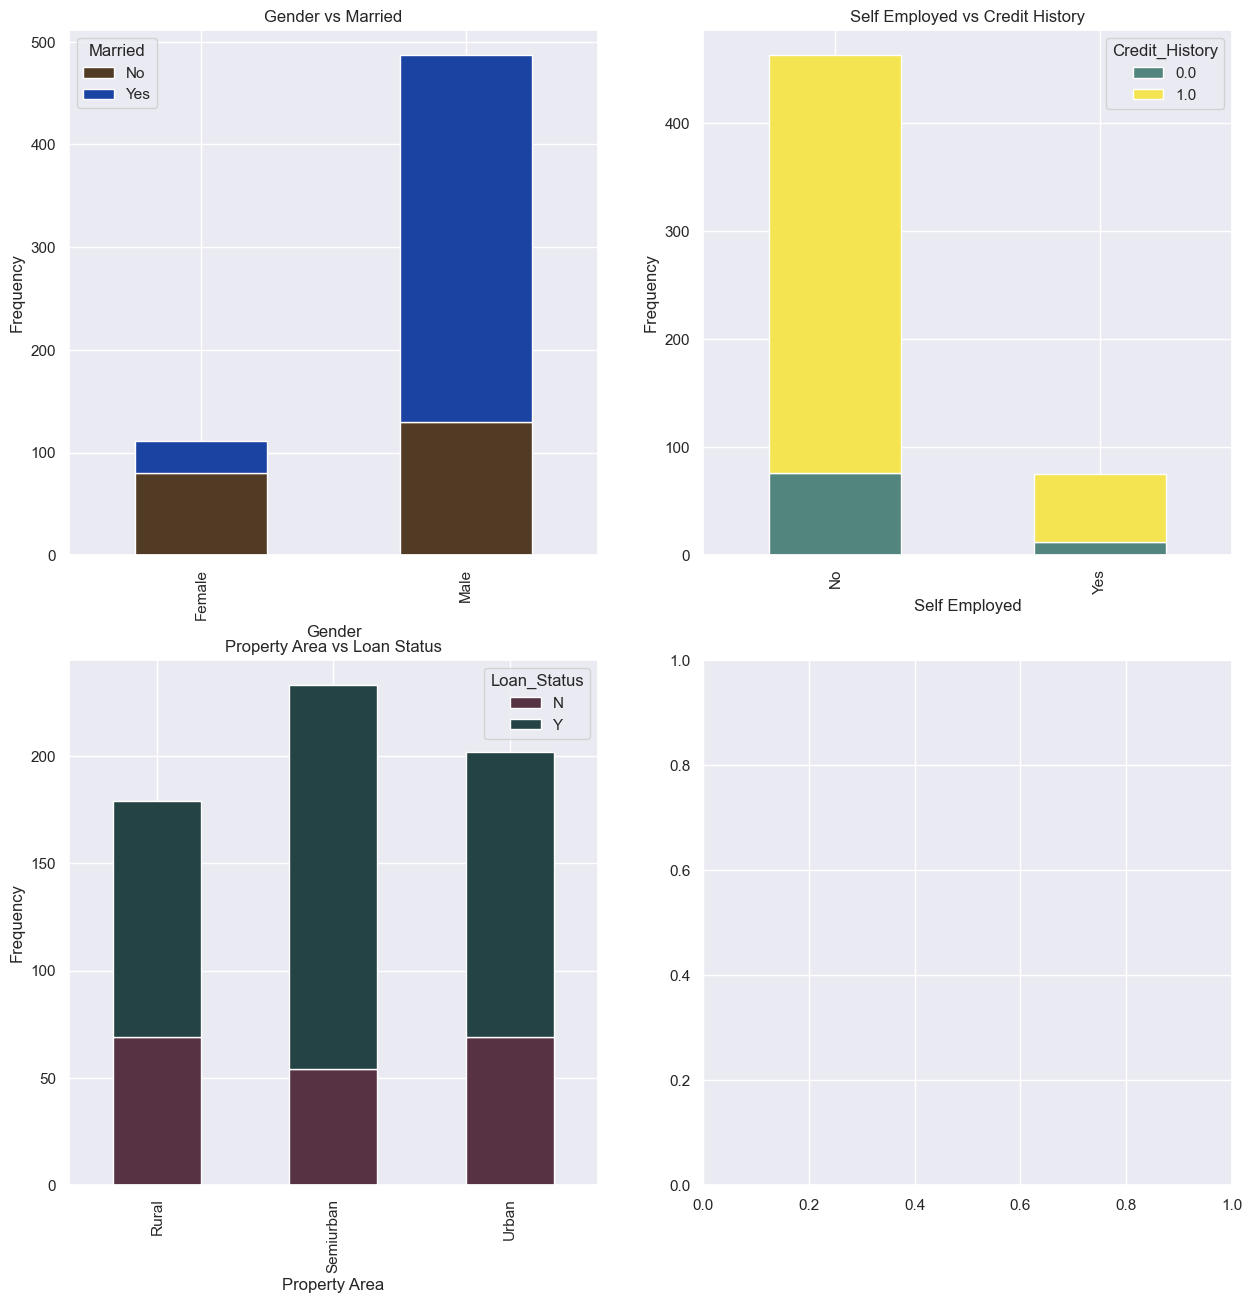

In [18]:
fig, axs2 = plt.subplots(2, 2, figsize=(15, 15))
pd.crosstab(dataset.Gender,dataset.Married).plot(kind="bar", ax=axs2[0,0], stacked=True, color=['#513b24','#1b43a2'],
title="Gender vs Married", xlabel="Gender", ylabel="Frequency")

pd.crosstab(dataset.Self_Employed,dataset.Credit_History).plot(kind="bar", ax=axs2[0,1], stacked=True, color=['#51857d','#f4e452'], 
title="Self Employed vs Credit History", xlabel="Self Employed", ylabel="Frequency",legend={"Bad Credit", "Good Credit"})

pd.crosstab(dataset.Property_Area,dataset.Loan_Status).plot(kind="bar", ax=axs2[1,0], stacked=True, color=['#563242','#234344'],
title="Property Area vs Loan Status", xlabel="Property Area", ylabel="Frequency")

plt.show()

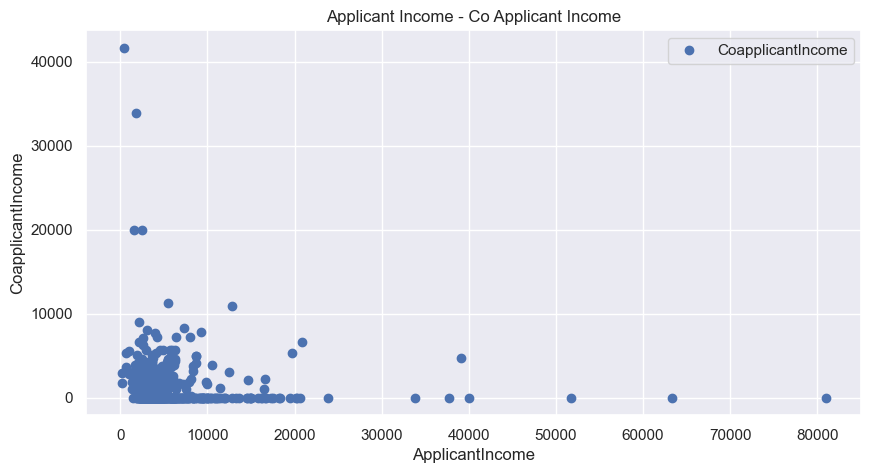

In [19]:
dataset.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o', figsize=[10,5])  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()